In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [77]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


On a donc 1 an et 1 semaine de donnée

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Analyse des Features

### Exploration des features

In [8]:
generator = (x for x in df)

In [9]:
col = next(generator)
print(col)
print(df[col].value_counts(), "\n")
print(len(df[df[col].isnull()]), "\n")
print(df[col].describe(), "\n")

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
579777      687
581217      676
537434      675
580730      662
538071      652
580367      650
580115      645
581439      635
580983      629
578344      622
538349      620
578347      606
537638      601
537237      597
536876      593
576617      593
536592      592
537823      591
576837      585
579508      578
577078      572
537240      568
577358      561
576618      552
576840      544
           ... 
561282        1
561271        1
C560585       1
561256        1
561255        1
561368        1
561372        1
561386        1
561482        1
C541501       1
561491        1
561490        1
561489        1
561487        1
561486        1
561484        1
C552568       1
561483        1
561481        1
561392        1
561480        1
561479        1
561478        1
561477        1
561476        1
561475        1
C543635       1
C569902       1
C561591       1
558730        1
Name: InvoiceN

### Gestion des invoice cancelled ou non

Les ventes cancelled ont un C en 1ere lettre, on va donc creer une nouvelle feature pour gérer les annulations. Par la suite on va pouvoir re-convertir les numéros de vente en int

In [10]:
df["Cancelled"] = df["InvoiceNo"].str.startswith("C")
df["Cancelled"] = df["Cancelled"].fillna(False)

In [11]:
df[df["Cancelled"] == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,True


In [12]:
df[df["InvoiceNo"] == 581490]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled


In [13]:
df['InvoiceNo'].replace(to_replace="\D+", value=r"", regex=True, inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('int')

### StockCode

On ne peut pas faire grand chose avec les stocks code. On remarque juste une similarité des article en fonciton de leur clé

In [14]:
df[["StockCode", "Description"]].head(20)

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
5,22752,SET 7 BABUSHKA NESTING BOXES
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,22633,HAND WARMER UNION JACK
8,22632,HAND WARMER RED POLKA DOT
9,84879,ASSORTED COLOUR BIRD ORNAMENT


### Description

Au niveau description, on remarque que la majorité sont en Majuscule sauf certains en minuscule ou avec ???. On va donc creuser un peu

In [15]:
df["Description"].str.islower().sum()

493

In [16]:
df[df["Description"].str.islower() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom,False
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom,False
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,False
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,False
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,False
15651,537639,22734,amazon,30,2010-12-07 15:29:00,0.0,NaN,United Kingdom,False
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom,False
24290,538348,22734,amazon,30,2010-12-10 14:59:00,0.0,NaN,United Kingdom,False
30555,538873,22734,amazon sales,20,2010-12-14 15:13:00,0.0,NaN,United Kingdom,False
42564,540010,22501,reverse 21/5/10 adjustment,-100,2011-01-04 11:13:00,0.0,NaN,United Kingdom,False


In [17]:
df[df["Description"].str.startswith("?") == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom,False
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom,False
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom,False
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.0,NaN,United Kingdom,False
50806,540558,21258,?,-29,2011-01-10 10:04:00,0.0,NaN,United Kingdom,False
51673,540651,82599,?,-290,2011-01-10 15:00:00,0.0,NaN,United Kingdom,False
68920,541882,48185,?,-57,2011-01-24 10:54:00,0.0,NaN,United Kingdom,False
78235,542861,47591B,?,-207,2011-02-01 11:47:00,0.0,NaN,United Kingdom,False
94765,544410,84997C,?,-741,2011-02-18 13:54:00,0.0,NaN,United Kingdom,False
97643,544649,21621,?,-400,2011-02-22 12:37:00,0.0,NaN,United Kingdom,False


C'est toujours Nan en Client donc c'est surement le magasin, on peut donc supprimer les lignes

In [78]:
df = df[df["Description"].str.startswith("?") == False]
df = df[df["Description"].str.isupper() == True]

# ajouté suite exploration
df = df[df["Description"].str.contains("LOST") == False]

on peut aussi essayer de parser les noms pour avoir des Keywords

In [18]:
# (df["Description"].value_counts() > 100).sum()

In [19]:
# df["KEY0"] = df["Description"].str.split().str.get(0)
# df["KEY1"] = df["Description"].str.split().str.get(1)

In [20]:
# df.groupby(["KEY0", "KEY1", "StockCode"]).agg({"Country":"count"})

Les mot clé seront difficilement gérable et parfois menant sur des fausses pistes ( ex avec les couleurs). Du coup on va s'ocduper des données pour faire un OHE. L'objectif étant de grouper les objets similaires (exemple une table blanche et une table rouge)

In [79]:
df_obj = df["Description"].drop_duplicates().reset_index(drop=True)

In [158]:
df_obj.drop_duplicates()

0                            T LIGHT HOLDER
1                             METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4                       WOOLLY HOTTIE HEART
5                  SET BABUSHKA NESTG BOXES
7                       H WARMER UNION JACK
8                        H WARMER POLKA DOT
9             ASSORTED COLOUR BIRD ORNAMENT
10                        POPPY S PLAYHOUSE
12          FELTCRAFT PRCESS CHARLOTTE DOLL
13                                      MUG
14            BOX ASSORTED COLOUR TEASPOONS
15                  BOX VTAGE JIGSAW BLOCKS
16                BOX VTAGE ALPHABET BLOCKS
17                        BUILDG BLOCK WORD
19                   RECIPE BOX METAL HEART
20                         DOORMAT NEW ENGL
21                                  JAM JAR
22                  COAT RACK PARIS FASHION
26                     ALARM CLOCK BAKELIKE
29                 PA BUNNIES STICKER SHEET
30                          STAR

In [157]:
df_obj.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).sort_values()

GEOMETRIC           1.0
DOTCOM              1.0
DOTCOMGIFTSHOP      1.0
DOTS                1.0
DOUBLE              1.0
MELAME              1.0
MEDICE              1.0
MED                 1.0
DRAGON              1.0
ME                  1.0
DRAGONS             1.0
MAXWELL             1.0
TAPES               1.0
DRAWERKNOB          1.0
MATCH               1.0
TAPER               1.0
DRAWSTRG            1.0
DREAM               1.0
DREAMS              1.0
SNOWSTORM           1.0
DOT                 1.0
MEMOBOARD           1.0
TATTOOS             1.0
MEMORIES            1.0
DO                  1.0
DOC                 1.0
DOCTOR              1.0
DOGGY               1.0
MICE                1.0
MIATURE             1.0
                  ...  
SIGN               64.0
GARDEN             66.0
WRAP               67.0
BRACELET           68.0
EARRGS             69.0
COVER              70.0
MUG                72.0
ART                72.0
CAKE               81.0
PAPER              83.0
RETROSPOT       

In [156]:
df_obj[df_obj.str.contains("SNACK TRAY")].drop_duplicates()

3898    SNACK TRAY
Name: Description, dtype: object

In [141]:
pat = r"RED|BLUE|PINK|BLACK|WHITE|GREEN|ROSE|SILVER|IVORY|YELLOW|LAVENDER|TURQUOISE"
df_obj = df_obj.str.replace(pat, '')

In [85]:
pat = r"LARGE|MEDIUM|SMALL"
df_obj = df_obj.str.replace(pat, '')

In [86]:
pat = r"OF|THE|IN|AND|WITH"
df_obj = df_obj.str.replace(pat, '')

In [87]:
pat = r"\d"
df_obj = df_obj.str.replace(pat, '')

In [88]:
pat = r"\s+"
df_obj = df_obj.str.replace(pat, " ")

In [119]:
pat = r"\W+"
df_obj = df_obj.str.replace(pat, " ")

In [143]:
df_obj = df_obj.str.strip()

In [90]:
pat = r".*T-LIGHT HOLDER.*"
df_obj = df_obj.str.replace(pat, 'T-LIGHT HOLDER')

In [150]:
pat = r".*(NECKLACE|BAG CHARM|BRACELET|GLOVES?).*"
df_obj = df_obj.str.replace(pat, r'\1')

pat = r".*GLOVES?.*"
df_obj = df_obj.str.replace(pat, r'GLOVES')

In [92]:
pat = r".*(JUMBO|CHARLOTTE|LUNCH|SHOULDER|GIFT|SHOPPER).*BAG.*"
df_obj = df_obj.str.replace(pat, r'\1 BAG')

In [102]:
pat = r".*(CARDS?|MUG).*"
df_obj = df_obj.str.replace(pat, r'\1')

In [112]:
pat = r".*(BON BON|SWEET|JAM).*JAR.*"
df_obj = df_obj.str.replace(pat, r'\1 JAR')

In [116]:
pat = r".*(CAKE CASES).*"
df_obj = df_obj.str.replace(pat, r'\1')

In [155]:
pat = r".*(POPPY S PLAYHOUSE|BUILDG BLOCK WORD|SNACK TRAY).*"
df_obj = df_obj.str.replace(pat, r'\1')

In [129]:
pat = r".*(CUSHION|PASSPORT|FOOD).*COVER.*"
df_obj = df_obj.str.replace(pat, r'\1 COVER')

pat = r".*COVER.*(CUSHION|PASSPORT|FOOD).*"
df_obj = df_obj.str.replace(pat, r'\1 COVER')

In [21]:
# df["Description"] = df["Description"].replace(' ', '_', regex=True)

In [22]:
# df = pd.concat([df, pd.get_dummies(df["Description"])], axis=1)

In [23]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537363 entries, 0 to 541908
Columns: 4027 entries, InvoiceNo to _TRELLIS_COAT_RACK
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(3), uint8(4018)
memory usage: 2.0+ GB


### Quantity

Sur cette feature il n'y a pas grand chose a dire non plus, on a le prix unitaire et le nombre acheté.

In [20]:
df[["Description", "Quantity"]].head(10)

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
5,SET 7 BABUSHKA NESTING BOXES,2
6,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,HAND WARMER UNION JACK,6
8,HAND WARMER RED POLKA DOT,6
9,ASSORTED COLOUR BIRD ORNAMENT,32


### InvoiceDate

On peut decouper la date par jour/moment de la journée (matin/midi/apres midi)

In [25]:
df["Weekday"] = df["InvoiceDate"].dt.weekday

In [26]:
df["Time"] = df["InvoiceDate"].dt.hour

In [27]:
def convert_to_moment(x):
    if 6 <= x <12:
        return "Morning"
    elif 12 <= x < 17:
        return "Afternoon"
    elif 17 <= x <=20:
        return "Late"

df["Time"] = df["Time"].apply(convert_to_moment)

In [28]:
df = pd.concat([df, pd.get_dummies(df['Time'])], axis=1)

In [29]:
df.drop("Time", axis=1, inplace=True)

In [30]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,10_COLOUR_SPACEBOY_PEN,...,_OVAL_WALL_MIRROR_DIAMANTE_,_RED_SPOT_GIFT_BAG_LARGE,_SET_2_TEA_TOWELS_I_LOVE_LONDON_,_SPACEBOY_BABY_GIFT_SET,_TOADSTOOL_BEDSIDE_LIGHT_,_TRELLIS_COAT_RACK,Weekday,Afternoon,Late,Morning
0,536365,85123A,WHITE_HANGING_HEART_T-LIGHT_HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
1,536365,71053,WHITE_METAL_LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
2,536365,84406B,CREAM_CUPID_HEARTS_COAT_HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
3,536365,84029G,KNITTED_UNION_FLAG_HOT_WATER_BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
4,536365,84029E,RED_WOOLLY_HOTTIE_WHITE_HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
5,536365,22752,SET_7_BABUSHKA_NESTING_BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
6,536365,21730,GLASS_STAR_FROSTED_T-LIGHT_HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
7,536366,22633,HAND_WARMER_UNION_JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
8,536366,22632,HAND_WARMER_RED_POLKA_DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1
9,536367,84879,ASSORTED_COLOUR_BIRD_ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False,0,...,0,0,0,0,0,0,2,0,0,1


### Gestion CustomerID/Country

On peut regarder la nationalité des clients. Elle sera comparé au CA. Si 10% des clients sont étrangers mais rapportent 30% du CA, ca vaut le coup de les garder

In [31]:
df[df['CustomerID'].isnull()]["Country"].value_counts()

United Kingdom    131028
EIRE                 697
Hong Kong            282
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

In [32]:
repartition = df[df['CustomerID'].isnull()]["Country"].value_counts()
percent = repartition["United Kingdom"]/repartition.sum()
percent

0.98898013404987617

98.9 % des clients sont au Royaume Uni

In [33]:
# df["CustomerID"] = df["CustomerID"].astype(int)
# df["InvoiceNo"] = df["InvoiceNo"].astype(int)

# Exploration

### Panier moyen

On peut continuer l'exploration en regardant le panier moyen. Pour ce faire on va faire un second dataset avec de l'aggrégation pour detecter d'autres possibilité de nettoayge

In [34]:
def create_light_DF(regenerate = True):
    df2 = df.copy()
    now = df2["InvoiceDate"].max()
    first = df2["InvoiceDate"].min()
    if regenerate:
        df2 = df2[df2["Cancelled"] == False]
        df2["Price"] = df2["Quantity"].multiply(df2["UnitPrice"], axis="index")
        newDF = df2.groupby('InvoiceNo').agg({
            'Price': 'sum',
            'Quantity': 'sum', 
            'CustomerID': lambda x: x.iloc[0],
            'Country': lambda x: x.iloc[0],
            'InvoiceDate': lambda x: x.iloc[0]
            })
        newDF["Recency"] = now-newDF["InvoiceDate"]
        newDF["Recency"] = pd.to_timedelta(newDF["Recency"]).astype("timedelta64[D]")
        return newDF
    else:
        newDF = pd.read_csv("new_DF.csv")
        newDF["InvoiceDate"] = pd.to_datetime(newDF["InvoiceDate"])
        return newDF

In [35]:
newDF = create_light_DF(True)

MemoryError: 

In [ ]:
print(newDF["Price"].describe())
newDF["Price"].hist(range = (0, 1000), bins=50)

On a un prix de vente negatif, il faut donc creuser (ce n'est plus le cas avec le nettoyage via les description en minuscule pas faite initiallement)

In [36]:
# newDF["Price"]

In [28]:
# newDF[newDF["Price"] < 0]

In [29]:
# neg_price = list(newDF[newDF["Price"] < 0].index)

In [30]:
# for inv in neg_price:
#     print(df[df["InvoiceNo"] == int(inv)])

Ces frais étaient des remboursement majoritairement donc avec un cout negatif. Le client était aussi Nan (donc probablement le magasin). On peut regarder s'il y a d'autres achat avec un Customer Nan pas annulé

In [31]:
df[df["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,False
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,False
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,False


On remarque que ce sont souvent des gros achat d'un coup par periode. C'est surement pour decorer le magasin (par exemple a Noel). On va donc aussi supprimer ces lignes. 

In [32]:
df = df[df["CustomerID"].notnull()]

On voit aussi au passage que le 1er item n'a pas de description, il faut donc jeter un coup d'oeil (ce n'est plus le cas avec le nettoyage des descriptions en minuscule)

In [33]:
# df[df["Description"].isnull()]

Que des objets sans prix donc surement des erreurs de saises en plus venant du proprietaire du magasin. On va donc les supprimer aussi

In [34]:
# df = df[df["CustomerID"].notnull()]
# df = df[df["Description"].notnull()]

On regénère donc le nouveau dataset avec les prix et continuer l'exploration

count     18434.000000
mean        479.508688
std        1680.719355
min           0.000000
25%         158.400000
50%         302.660000
75%         470.400000
max      168469.600000
Name: Price, dtype: float64


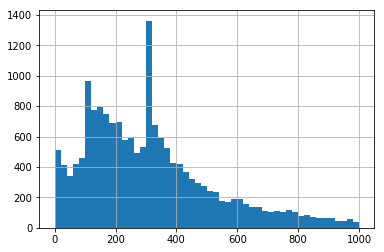

In [35]:
newDF = create_light_DF(True)
print(newDF["Price"].describe())
newDF["Price"].hist(range=(0,1000), bins=50)

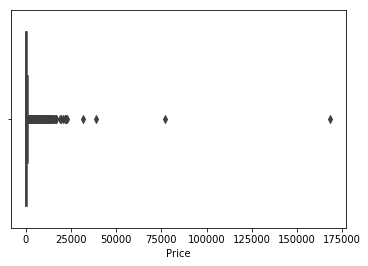

In [36]:
sns.boxplot(x=newDF["Price"])

On remarque qu'il reste tout de même des outliers (160 000 euros en 1 facture). oN peut regarder laquelle c'est:

In [37]:
newDF[newDF["Price"] > 25000]

,Price,Quantity,CustomerID,Country,InvoiceDate,Recency
InvoiceNo,,,,,,
541431,77183.60,74215,12346.0,United Kingdom,2011-01-18 10:01:00,325.0
556444,38970.00,60,15098.0,United Kingdom,2011-06-10 15:28:00,181.0
567423,31698.16,12572,17450.0,United Kingdom,2011-09-20 11:05:00,80.0
581483,168469.60,80995,16446.0,United Kingdom,2011-12-09 09:15:00,0.0


regardons les vente pour un invoice

In [38]:
df[df["InvoiceNo"] == 581483]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,False


curieusement il y a un vrai client, on peut donc afficher pour celui-ci, la liste de ses acahts

In [39]:
df[df["CustomerID"] == 16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,False
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,False
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,False
540422,581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,True


Voila, c'est une erreur et il y a eu remboursement

In [40]:
df[df["CustomerID"] == 15098.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,False
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,False
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,False
222692,556448,22502,PICNIC BASKET WICKER SMALL,-60,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,True


Il va donc faloir s'occuper des achats cancelled pour supprimer les acahts initiaux

In [41]:
cancelled = df[df["Cancelled"] == True][["CustomerID", "Quantity", "StockCode"]]
cancelled

,CustomerID,Quantity,StockCode
154,15311.0,-1,35004C
235,17548.0,-12,22556
236,17548.0,-24,21984
237,17548.0,-24,21983
238,17548.0,-24,21980
239,17548.0,-12,21484
240,17548.0,-12,22557
241,17548.0,-24,22553
939,17897.0,-6,22960
1441,17841.0,-1,22632


In [42]:
gen = cancelled.iterrows()

In [43]:
index, row = next(gen)
cust, qte, stock = row.tolist()
print(df[(df["StockCode"] == stock) & (df["CustomerID"] == cust) ])

       InvoiceNo StockCode                      Description  Quantity  \
154       536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
9200      537195    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
18196     537805    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
28630     538651    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
39381     539640    35004C  SET OF 3 COLOURED  FLYING DUCKS        -3   
44157     540157    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
59542     541293    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
78333     542866    35004C  SET OF 3 COLOURED  FLYING DUCKS        -2   

              InvoiceDate  UnitPrice  CustomerID         Country  Cancelled  
154   2010-12-01 09:49:00       4.65     15311.0  United Kingdom       True  
9200  2010-12-05 13:55:00       4.65     15311.0  United Kingdom      False  
18196 2010-12-08 13:18:00       4.65     15311.0  United Kingdom       True  
28630 2010-12-13 15:07:00     

Le problème c'est que l'on ne peut pas trouver tel quel quel acaht précis a été remboursé car parfois on n'a pas ni l'acaht, or la qte n'est pas la même. De ce fait, comme on supprime sur le dataset du modèle (newDF) les acaht cancelled, on va juste supprimer les outliers au niveau des acahts totaux dans ce nouveau dataset

In [44]:
seuil = newDF["Price"].mean() + 5*newDF["Price"].std()
tid = list(newDF[newDF["Price"]>seuil].index)
print(tid)

[537657, 537659, 540689, 540815, 541206, 541220, 541431, 543989, 544479, 545475, 546789, 547708, 548011, 550461, 552883, 552978, 553368, 553546, 554366, 554827, 555920, 556255, 556444, 556726, 556917, 558262, 558526, 560445, 561633, 561901, 562439, 562789, 563074, 563076, 563590, 563614, 566934, 567280, 567381, 567423, 569570, 569650, 569815, 572035, 572209, 573153, 578305, 580727, 581175, 581457, 581483]


In [45]:
for each in tid:
    df = df[df["InvoiceNo"] != int(each)]

In [46]:
newDF = create_light_DF(regenerate = True)

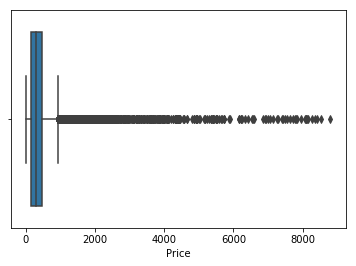

In [47]:
sns.boxplot(x=newDF["Price"])

On ne va pas supprimer les points suivant pour eviter de supprimer des acaht potentiellement vrais bien que gros (par exemple des acahts pro)

## Analyse du CA

A titre informatif, on peut regarder le C/A par semaine de l'année et d'ou sont issues le CA

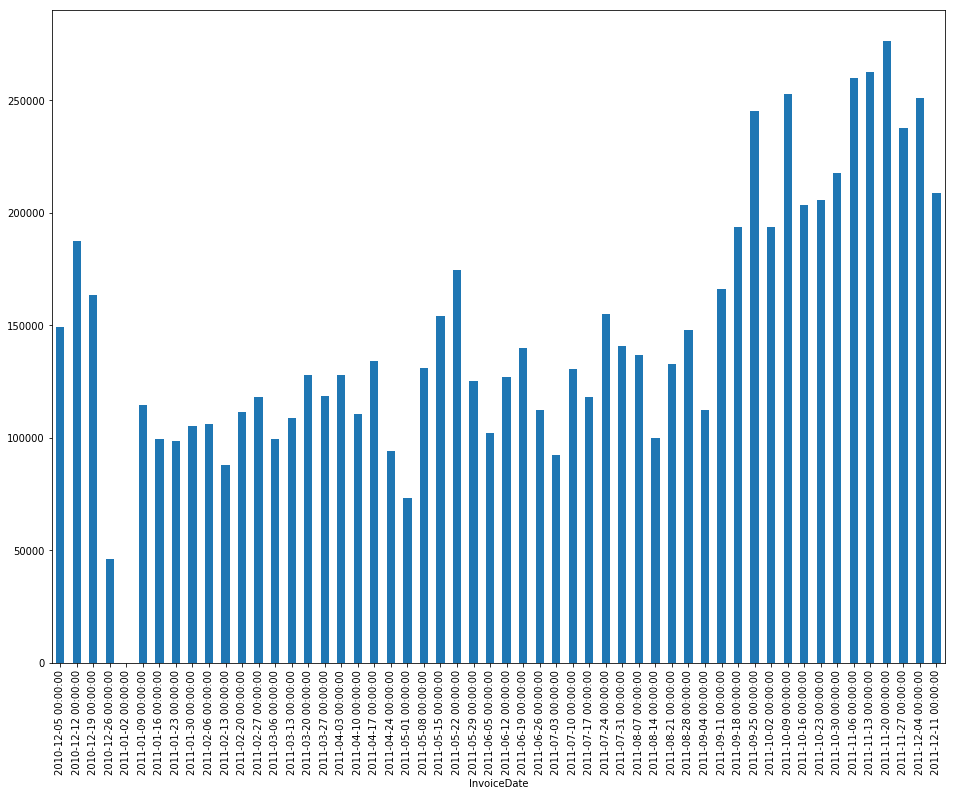

In [48]:
# newDF.groupby(pd.Grouper(key='InvoiceDate', freq='D'))["Price"].sum().unstack()
newDF.resample('W', on='InvoiceDate')['Price'].sum().fillna(0).plot(kind="bar", figsize=(16,12))  #http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

Comme imaginable on retrouve un pic vers noel. Concernant les ventes on peut classer les pays en fonction de leur apport dans le CA

In [49]:
CA_per_countries = newDF.groupby(["Country"])["Price"].sum().sort_values()

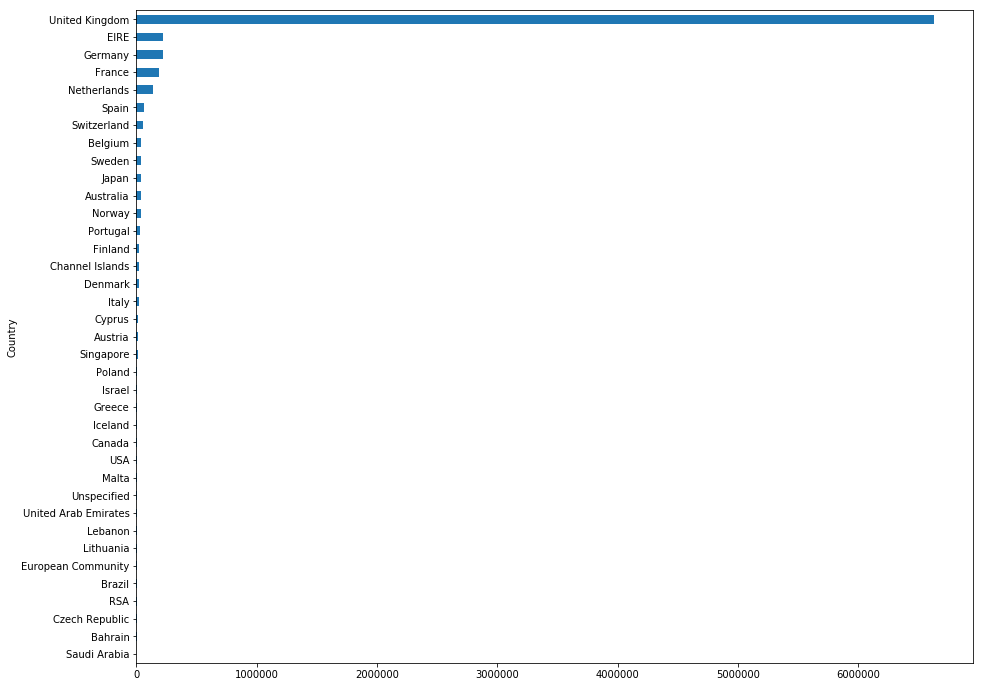

In [50]:
CA_per_countries.plot(kind='barh', figsize=(15,12))
plt.show()

In [51]:
CA_per_countries["United Kingdom"]/CA_per_countries.sum()

0.84011841671246479

In [52]:
print(list(CA_per_countries.index[::-1]))

['United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands', 'Spain', 'Switzerland', 'Belgium', 'Sweden', 'Japan', 'Australia', 'Norway', 'Portugal', 'Finland', 'Channel Islands', 'Denmark', 'Italy', 'Cyprus', 'Austria', 'Singapore', 'Poland', 'Israel', 'Greece', 'Iceland', 'Canada', 'USA', 'Malta', 'Unspecified', 'United Arab Emirates', 'Lebanon', 'Lithuania', 'European Community', 'Brazil', 'RSA', 'Czech Republic', 'Bahrain', 'Saudi Arabia']


On peut maintenant encoder le dataset en fonction de leur classement

In [53]:
decoder_countries = {i: j for i, j in enumerate(CA_per_countries.index[::-1]) }
encoder_countries = {j: i for i, j in enumerate(CA_per_countries.index[::-1]) }

16 % des revenus sont étrangers

Le dataset a l'air plus clean, on peut donc le sauvegarder apreès avoir supprimé les acahts annulés

In [54]:
newDF = create_light_DF(True)
df = df[df["Cancelled"] == False]
df.drop("Cancelled", axis=1, inplace=True)
df.to_csv("Online_Retail_clean.csv")

In [55]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Modélisation

Afin d'effectuer le clustering, on va réutiliser le principe du RFM mais avec plus de features. On peut notament penser à :

<li>Panier Moyen par visite</li>
<li>Nombre d'article moyen par visite</li>
<li>Durée moyenne entre les visites</li>
<li>Dernière visite</li>
<li>Nombre de visite</li>
<li>Pays</li>

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict, Counter

In [ ]:
newDF = pd.read_csv("new_DF.csv")

In [ ]:
newDF["InvoiceDate"] = pd.to_datetime(newDF["InvoiceDate"])

In [ ]:
newDF["Country"] = newDF["Country"].apply(lambda x:encoder_countries[x])

In [ ]:
newDF.info()

In [ ]:
# newDF.drop("InvoiceDate", axis=1, inplace=True)
newDF.drop("InvoiceNo", axis=1, inplace=True)

In [ ]:
newDF.info()

In [ ]:
newDF["freq"] = 0
newDF["nb_visits"] = 0

In [ ]:
rfmTable = newDF.groupby(['CustomerID']).agg({
    'Recency': ['min', "max"], 
    'Number_article': ["sum", "mean"],
    "Price": ['sum', "mean"],
    "Country" : "mean",
    "freq" : "mean",
    "nb_visits" : "count"
}).reset_index()

In [ ]:
rfmTable["freq"] = (rfmTable["Recency"]["max"] - rfmTable["Recency"]["min"]) / rfmTable["nb_visits"]["count"]

In [ ]:
a = pd.DataFrame(rfmTable.to_records())
a.drop(["index"], axis=1, inplace=True)
a = a.set_index("('CustomerID', '')")

In [222]:
final_df = a[[
    "('Recency', 'min')", 
    "('Number_article', 'mean')", 
    "('Price', 'mean')", 
    "('Country', 'mean')", 
    "('freq', 'mean')", 
    "('nb_visits', 'count')"
]]
final_df.columns = ["Recency", "Avg_article", "Avg_Price", "Country", "Freq_visits", "nb_visits"]

In [230]:
final_df

,Recency,Avg_article,Avg_Price,Country,Freq_visits,nb_visits
0,1.0,26.000000,615.714286,23.00,52.142857,7
1,74.0,7.750000,449.310000,13.00,70.750000,4
2,18.0,73.000000,1757.550000,17.00,0.000000,1
3,309.0,17.000000,334.400000,11.00,0.000000,1
4,35.0,10.625000,313.255000,11.00,32.625000,8
5,203.0,4.000000,89.000000,35.00,0.000000,1
6,231.0,58.000000,1079.400000,6.00,0.000000,1
7,213.0,13.000000,459.400000,35.00,0.000000,1
8,22.0,19.666667,937.143333,12.00,101.000000,3
9,32.0,131.000000,6207.670000,7.00,0.000000,1


In [231]:
final_df.to_csv("final_df.csv", index=False)

# Mise en place du Clustering

In [101]:
final_df = pd.read_csv("final_df.csv")

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(final_df)

In [103]:
X_scaled

array([[ 0.00268097,  0.08760403,  0.07856004,  0.63888889,  0.28493365,
         0.02870813],
       [ 0.19839142,  0.02365309,  0.05732823,  0.36111111,  0.38661202,
         0.01435407],
       [ 0.04825737,  0.25229961,  0.2242488 ,  0.47222222,  0.        ,
         0.        ],
       ..., 
       [ 0.01876676,  0.01752081,  0.01135885,  0.        ,  0.32240437,
         0.00478469],
       [ 0.0080429 ,  0.16206746,  0.01670558,  0.        ,  0.11372951,
         0.07177033],
       [ 0.11260054,  0.0782596 ,  0.07814056,  0.        ,  0.28961749,
         0.00956938]])

### Kmeans

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=5)
X_embedded = kmeans.fit_transform(X_scaled)

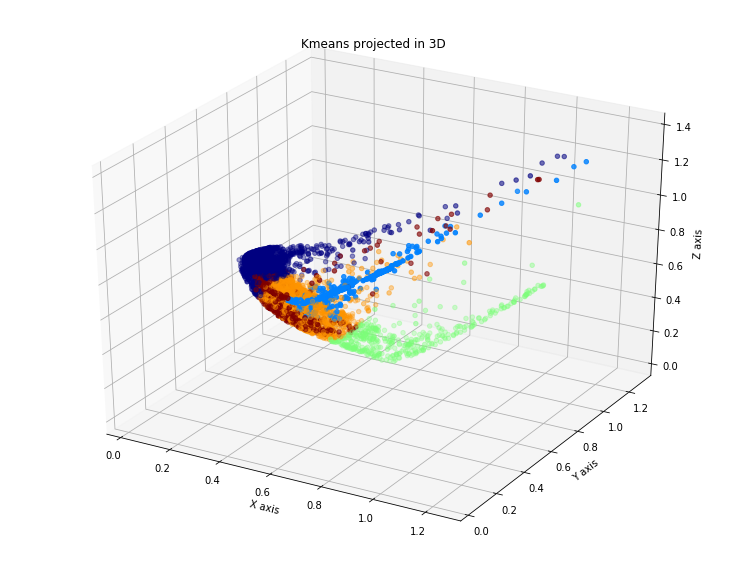

In [105]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=kmeans.labels_, cmap="jet")
plt.title("Kmeans projected in 3D")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.savefig("img/kmeans3d.png")
plt.show()

#### Exploration du résultat

In [9]:
final_df["label_kmeans"] = kmeans.labels_

In [10]:
def proportion(x):
    nb_abroad = x.astype(bool).sum(axis=0)
    nb_total = len(x)
    return (nb_total-nb_abroad)/nb_total

In [11]:
final_df.groupby("label_kmeans").agg({
    "Recency" : "mean",
    "Avg_article" : "mean",
    "Avg_Price" : "mean",
    "Country" : proportion,
    "Freq_visits" : "mean",
    "nb_visits" : "mean"
})

,Recency,Avg_article,Avg_Price,Country,Freq_visits,nb_visits
label_kmeans,,,,,,
0,35.901420,23.320097,384.295044,0.895572,51.297692,4.922306
1,298.239655,18.646046,320.641577,0.889655,2.706191,1.313793
2,47.528205,22.297650,343.569992,0.928205,110.795299,2.482051
3,168.632743,18.629588,334.345818,0.908555,17.332521,2.048673
4,32.324180,24.188176,409.048262,0.906899,9.615064,6.345613


### Clustering Hierarchique

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_cl = AgglomerativeClustering(n_clusters=5)
pos = agg_cl.fit_predict(X_scaled)

In [13]:
final_df["label_CH"] = pos

In [14]:
final_df.groupby("label_CH").agg({
    "Recency" : "mean",
    "Avg_article" : "mean",
    "Avg_Price" : "mean",
    "Country" : proportion,
    "Freq_visits" : "mean",
    "nb_visits" : "mean"
})

,Recency,Avg_article,Avg_Price,Country,Freq_visits,nb_visits
label_CH,,,,,,
0,36.577686,23.456899,384.375710,0.931405,21.706807,5.852066
1,175.664606,19.033079,323.551356,0.948995,26.772951,2.302937
2,39.916805,22.183250,338.203961,0.951747,95.313172,2.903494
3,300.516423,18.214793,319.780231,0.875912,2.055519,1.308394
4,51.114754,30.941117,814.213172,0.000000,33.013300,3.040984


### DBScan

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

params = [
    {
    "eps" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005],
    "min_samples" : list(range(3, 10))
    }]

for param in ParameterGrid(params):
    scan = DBSCAN(**param)
    pos = scan.fit_predict(X_scaled)
    n = len(np.unique(pos))
    print(param, n)

{'eps': 0.5, 'min_samples': 3} 2
{'eps': 0.5, 'min_samples': 4} 2
{'eps': 0.5, 'min_samples': 5} 2
{'eps': 0.5, 'min_samples': 6} 2
{'eps': 0.5, 'min_samples': 7} 2
{'eps': 0.5, 'min_samples': 8} 2
{'eps': 0.5, 'min_samples': 9} 2
{'eps': 0.4, 'min_samples': 3} 2
{'eps': 0.4, 'min_samples': 4} 2
{'eps': 0.4, 'min_samples': 5} 2
{'eps': 0.4, 'min_samples': 6} 2
{'eps': 0.4, 'min_samples': 7} 2
{'eps': 0.4, 'min_samples': 8} 2
{'eps': 0.4, 'min_samples': 9} 2
{'eps': 0.3, 'min_samples': 3} 2
{'eps': 0.3, 'min_samples': 4} 2
{'eps': 0.3, 'min_samples': 5} 2
{'eps': 0.3, 'min_samples': 6} 2
{'eps': 0.3, 'min_samples': 7} 2
{'eps': 0.3, 'min_samples': 8} 2
{'eps': 0.3, 'min_samples': 9} 2
{'eps': 0.2, 'min_samples': 3} 2
{'eps': 0.2, 'min_samples': 4} 2
{'eps': 0.2, 'min_samples': 5} 2
{'eps': 0.2, 'min_samples': 6} 2
{'eps': 0.2, 'min_samples': 7} 2
{'eps': 0.2, 'min_samples': 8} 2
{'eps': 0.2, 'min_samples': 9} 2
{'eps': 0.1, 'min_samples': 3} 10
{'eps': 0.1, 'min_samples': 4} 6
{'eps': 0

In [16]:
param_selected = {'eps': 0.05, 'min_samples': 7}
scan = DBSCAN(**param_selected)
pos = scan.fit_predict(X_scaled)
final_df["label_DBS"] = pos

### Visualisation du partitionnement

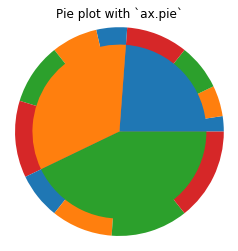

In [64]:
vals = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]])
fig, ax = plt.subplots()
ax.pie(vals.flatten(), radius=1.2,
       colors=plt.rcParams["axes.prop_cycle"].by_key()["color"][:vals.shape[1]])
ax.pie(vals.sum(axis=1), radius=1)
ax.set(aspect="equal", title='Pie plot with `ax.pie`')

plt.show()

In [27]:
final_df[final_df["label_kmeans"] == 0]["label_CH"].value_counts().to_dict().values()

dict_values([842, 239, 71, 45])

In [28]:
final_df[final_df["label_kmeans"] == 1]["label_DBS"].value_counts().to_dict().values()

dict_values([450, 127, 3])

In [34]:
a = []
for kmeans_cluster in range(5):
    a.append(list(final_df[final_df["label_kmeans"] == kmeans_cluster]["label_CH"].value_counts().to_dict().values()))
a

[[842, 239, 71, 45],
 [531, 49],
 [362, 18, 9, 1],
 [509, 134, 18, 17],
 [1443, 50]]

IndexError: tuple index out of range

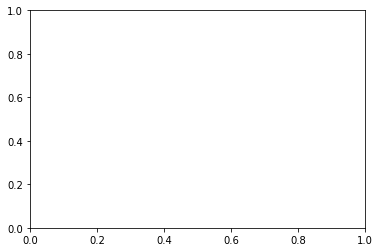

In [33]:
vals = np.array(a)
fig, ax = plt.subplots()
ax.pie(vals.flatten(), radius=1.2,
       colors=plt.rcParams["axes.prop_cycle"].by_key()["color"][:vals.shape[1]])
ax.pie(vals.sum(axis=1), radius=1)
ax.set(aspect="equal", title='Pie plot with `ax.pie`')

plt.show()

### Mise en place des notes

Au lieu de juste regarder par note (comme dans l'exemple avec 111 - 112 etc..) on utilise un clustering du coup on ne mettra pas de note comme ici

In [57]:
# rfmTable = pd.read_csv("RFM.csv")
# rfmTable

In [58]:
# quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
# quantiles = quantiles.to_dict()

In [59]:
# print(quantiles)

In [60]:
# def RScore(x,p,d):
#     if x <= d[p][0.25]:
#         return 1
#     elif x <= d[p][0.50]:
#         return 2
#     elif x <= d[p][0.75]: 
#         return 3
#     else:
#         return 4
    
# def FMScore(x,p,d):
#     if x <= d[p][0.25]:
#         return 4
#     elif x <= d[p][0.50]:
#         return 3
#     elif x <= d[p][0.75]: 
#         return 2
#     else:
#         return 1
    
# def Proximity(x,p,d):
#     if x == d[p][0.5]:
#         return 1
#     else:
#         return 4

In [61]:
# segmented_rfm = rfmTable
# segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
# segmented_rfm['f_quartile'] = segmented_rfm['Number_article'].apply(FMScore, args=('Number_article',quantiles,))
# segmented_rfm['m_quartile'] = segmented_rfm['Price'].apply(FMScore, args=('Price',quantiles,))
# segmented_rfm['p_quartile'] = segmented_rfm['Country'].apply(Proximity, args=('Country',quantiles,))
# segmented_rfm.head()

In [62]:
# print(segmented_rfm["Country"].value_counts())
# print(segmented_rfm["p_quartile"].value_counts())

In [63]:
# plt.figure(figsize=(12,12))
# sns.boxplot(y="Recency", x="p_quartile", data=segmented_rfm)
# plt.show()

In [64]:
# plt.figure(figsize=(12,12))
# sns.boxplot(y="Number_article", x="p_quartile", data=segmented_rfm)
# plt.show()

In [65]:
# plt.figure(figsize=(12,12))
# sns.boxplot(y="Price", x="p_quartile", data=segmented_rfm)
# plt.show()

## Nouveau modèle post analyse